AMATH 584 Homework 3  
Kelton Busby

# Problem 1

In [54]:
import numpy as np
import os
import scipy.linalg as spl
from matplotlib import pyplot as plt
import pandas as pd

## Modified Gram-Schmidt Orthogonalization Procedure

In [173]:
def modGramSchmidt(A):
    
    m,n = np.shape(A)
    Q = np.zeros([m,m])
    R = np.zeros([m,n])
    V = A.copy()
    
    
    '''Returns an orthogonalization of input matrix A using modified Gram-Schmidt algorithm.'''
    
    for i in np.arange(0,n):
        
        R[i,i] = np.linalg.norm(V[:,i], ord=2)
        Q[:,i]=V[:,i] / R[i,i]
        
        for j in np.arange(i+1,n):
            R[i,j] = np.dot(np.conjugate(np.transpose(Q))[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]            
        
    return Q,R
    

Creating a well conditioned matrix:

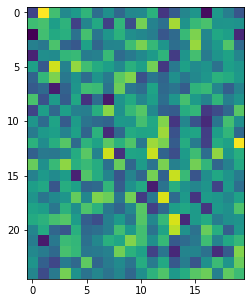

In [58]:
A = np.random.randn(25,20)
pd.DataFrame(A).to_csv('A.csv', index=False, header=False)

plt.figure(figsize=[5,5])
plt.imshow(A)

Checking the condition number:

In [59]:
np.round(np.linalg.cond(A),2)

8.94

Comparing the modified Gram Schmidt to scipy implementation of QR orthogonalization: 

In [60]:
q,r = modGramSchmidt(A)

# comparing with scipy QR
Q, R = spl.qr(A, mode='full')

Capital Q,R is scipy implementation.  
Lower q,r is my implementation. 

In [61]:
Q[0]

array([-0.30844347, -0.47132521, -0.11435251, -0.04784689,  0.1820166 ,
       -0.16074731,  0.19865693, -0.13595478, -0.15816356,  0.17845295,
        0.07498586, -0.29109721, -0.07583652,  0.18133798,  0.13187278,
       -0.1503046 , -0.14240492, -0.11566739, -0.02922873, -0.0288957 ,
        0.03291545,  0.46959684, -0.1664612 ,  0.08778576,  0.17951457])

In [62]:
q[0]

array([-0.30844347,  0.49217428,  0.16011719, -0.05873647,  0.10634771,
        0.17674733, -0.17028661,  0.01425597, -0.16264144, -0.04293302,
       -0.07356591,  0.06998552, -0.20703942, -0.21009687, -0.06954811,
       -0.04040537, -0.42734141,  0.01475031, -0.12681456, -0.15738494,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [63]:
np.diag(R)

array([ 5.41146736, -5.18488651, -5.10623257,  4.79226667,  4.4826084 ,
       -4.6093261 , -3.70677895,  4.78008226,  4.54425474,  3.05276309,
       -4.2675726 , -3.77201386,  5.32534377, -4.57753639, -2.98016826,
        3.63952531, -2.43728425,  2.72687911,  1.68637793, -2.35175886])

In [64]:
np.diag(r)

array([5.41146736, 5.19819303, 5.36158471, 4.80266246, 4.74866168,
       4.7992274 , 4.10358022, 5.41009093, 4.75289108, 4.30238878,
       5.01193306, 5.43053045, 5.99877556, 6.59872585, 3.91586332,
       5.76660034, 6.83206164, 4.64089308, 3.54592856, 5.67285852])

Bringing in the matlab:

Capital Q,Rmat is matlab implementation.  
Lower q,rmat is qrfactor implementation. 

In [404]:
## MATLAB Code Run in MATLAB ##

# A=importdata('C:\Users\Kelton\UW\AMATH584\Homework\hw3\A.csv');
# A=reshape(A,[25,20]);
# [q,r] = qrfactor(A);
# [Q,R] = qr(A);
# writematrix(q, 'qfactor.txt');
# writematrix(r, 'rfactor.txt');
# writematrix(Q, 'Qmat.txt');
# writematrix(R, 'Rmat.txt');

## MATLAB Code Run in MATLAB ##

In [66]:
Qmat = np.array(pd.read_csv('Qmat.txt', header=None))
Rmat = np.array(pd.read_csv('Rmat.txt', header=None))
qmat = np.array(pd.read_csv('qfactor.txt', header=None))
rmat = np.array(pd.read_csv('rfactor.txt', header=None))

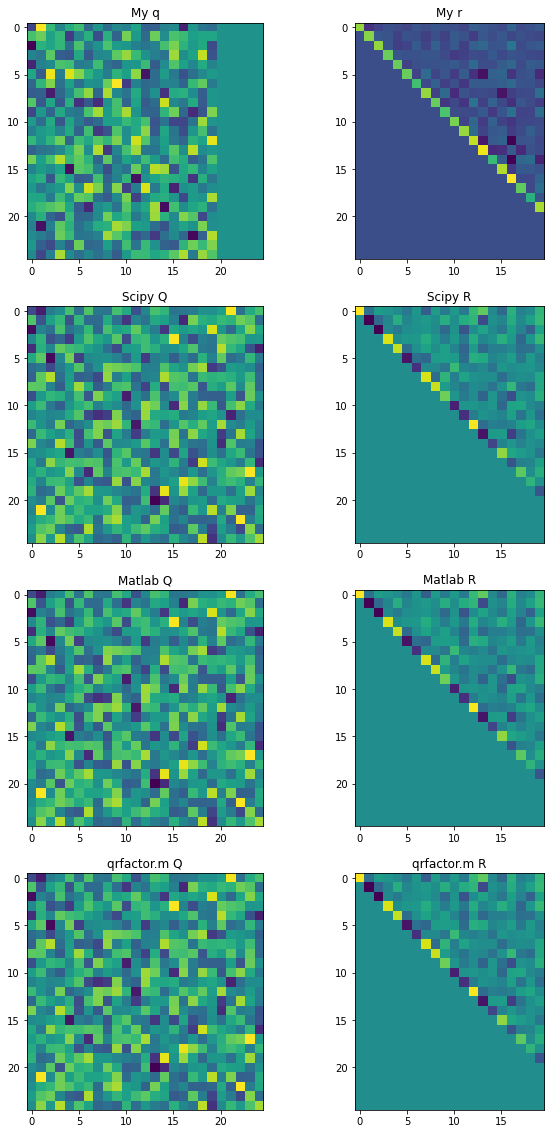

In [67]:
plt.figure(figsize=[10,20])
plt.subplot(4,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(4,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(4,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(4,2,4)
plt.title('Scipy R')
plt.imshow(R)
plt.subplot(4,2,5)
plt.title('Matlab Q')
plt.imshow(Qmat)
plt.subplot(4,2,6)
plt.title('Matlab R')
plt.imshow(Rmat)
plt.subplot(4,2,7)
plt.title('qrfactor.m Q')
plt.imshow(qmat)
plt.subplot(4,2,8)
plt.title('qrfactor.m R')
plt.imshow(rmat)

Can the algorithms reconstruct A?

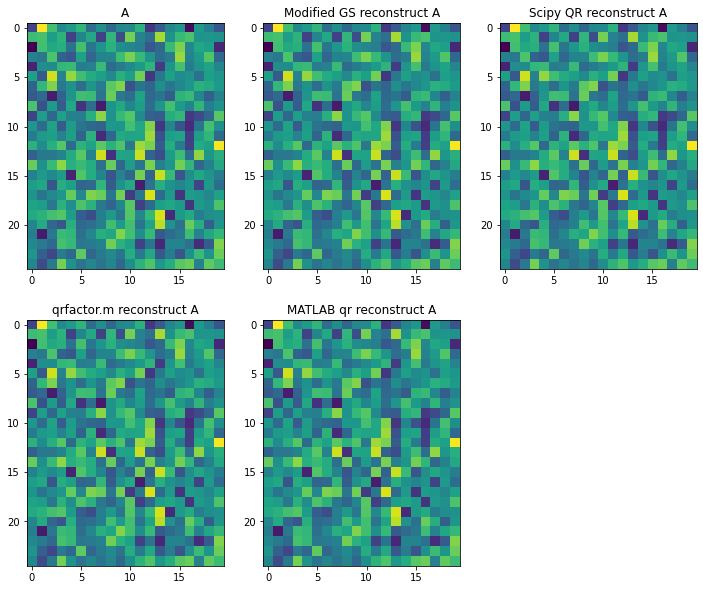

In [68]:
plt.figure(figsize=[12,10])
plt.subplot(2,3,1)
plt.title('A')
plt.imshow(A)
plt.subplot(2,3,2)
plt.title('Modified GS reconstruct A')
plt.imshow(q.dot(r))
plt.subplot(2,3,3)
plt.title('Scipy QR reconstruct A')
plt.imshow(Q.dot(R))
plt.subplot(2,3,4)
plt.title('qrfactor.m reconstruct A')
plt.imshow(qmat.dot(rmat))
plt.subplot(2,3,5)
plt.title('MATLAB qr reconstruct A')
plt.imshow(Qmat.dot(Rmat))

Scipy implementation of QR and Modified Gram-Schmidt are able to reconstruct A.  
qrfactor.m and MATLAB qr() are also able to reconstruct A.

Creating a matrix with poor conditioning:

In [122]:
from sklearn.datasets import make_classification
A = make_classification(n_repeated=3, n_samples=25, n_features=20)[0]
pd.DataFrame(A).to_csv('B.csv', index=False, header=False)

In [123]:
np.linalg.cond(A)

4.991931703090098e+16

In [124]:
q,r = modGramSchmidt(A)

In [125]:
Q,R = spl.qr(A)

In [126]:
Qmat = np.array(pd.read_csv('Qmat.txt', header=None))
Rmat = np.array(pd.read_csv('Rmat.txt', header=None))
qmat = np.array(pd.read_csv('qfactor.txt', header=None))
rmat = np.array(pd.read_csv('rfactor.txt', header=None))

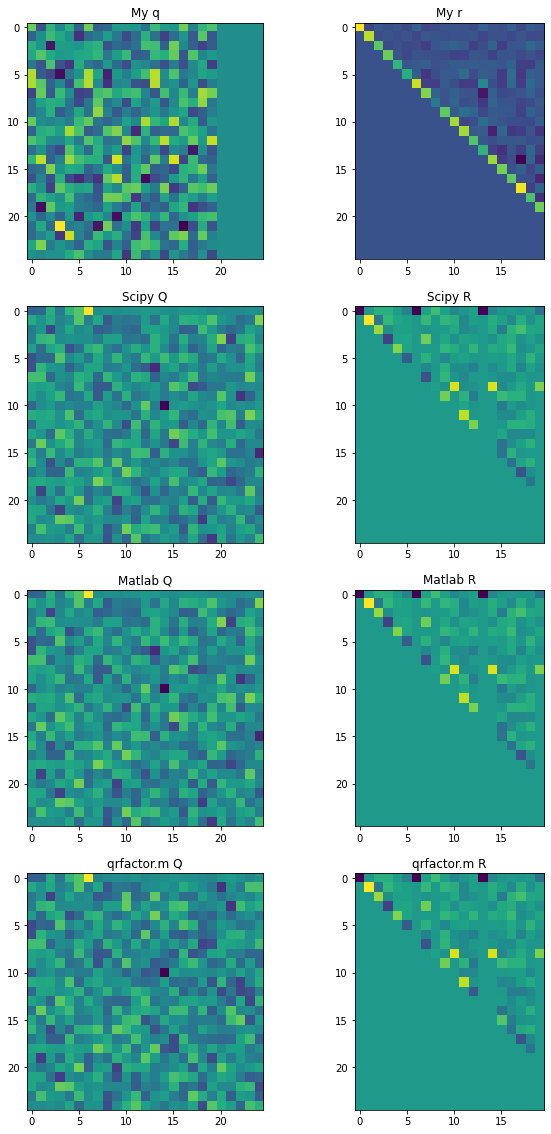

In [127]:
plt.figure(figsize=[10,20])
plt.subplot(4,2,1)
plt.title('My q')
plt.imshow(q)
plt.subplot(4,2,2)
plt.title('My r')
plt.imshow(r)
plt.subplot(4,2,3)
plt.title('Scipy Q')
plt.imshow(Q)
plt.subplot(4,2,4)
plt.title('Scipy R')
plt.imshow(R)
plt.subplot(4,2,5)
plt.title('Matlab Q')
plt.imshow(Qmat)
plt.subplot(4,2,6)
plt.title('Matlab R')
plt.imshow(Rmat)
plt.subplot(4,2,7)
plt.title('qrfactor.m Q')
plt.imshow(qmat)
plt.subplot(4,2,8)
plt.title('qrfactor.m R')
plt.imshow(rmat)

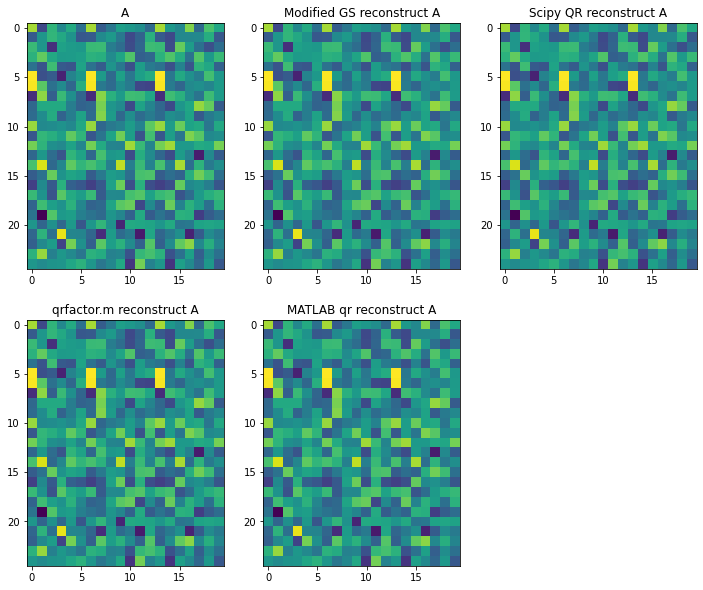

In [128]:
plt.figure(figsize=[12,10])
plt.subplot(2,3,1)
plt.title('A')
plt.imshow(A)
plt.subplot(2,3,2)
plt.title('Modified GS reconstruct A')
plt.imshow(q.dot(r))
plt.subplot(2,3,3)
plt.title('Scipy QR reconstruct A')
plt.imshow(Q.dot(R))
plt.subplot(2,3,4)
plt.title('qrfactor.m reconstruct A')
plt.imshow(qmat.dot(rmat))
plt.subplot(2,3,5)
plt.title('MATLAB qr reconstruct A')
plt.imshow(Qmat.dot(Rmat))

All methods can reconstruct A.

Do all the methods maintain orthogonality in Q when condition number is very high?

Scipy Orthogonality Check:

In [129]:
np.linalg.norm(Q.dot(Q.T) - np.identity(Q.shape[0]))

2.748187668753963e-15

Modified GS orthogonality check:

In [130]:
np.linalg.norm(q.dot(q.T) - np.identity(q.shape[0]))

6.328842140081237

qrfactor.m check:

In [131]:
np.linalg.norm(qmat.dot(qmat.T) - np.identity(qmat.shape[0]))

9.430206566111689e-15

MATLAB qr check:

In [132]:
np.linalg.norm(Qmat.dot(Qmat.T) - np.identity(Qmat.shape[0]))

8.506512673610261e-15

Modified GS (q) is not orthogonal when the matrix condition number is very high, where Scipy (Q) is orthogonal.  
All MATLAB methods maintain orthogonality.

When condition number is extremely high?

In [177]:
A = make_classification(n_classes=1,n_informative=1,n_redundant=0,n_repeated=19, n_samples=50, n_features=21)[0]
np.linalg.cond(A)

7.35992024121229e+305

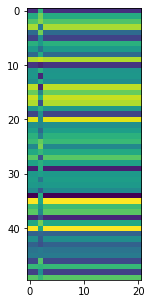

In [178]:
plt.figure(figsize=[5,5])
plt.imshow(A)

In [179]:
q,r = modGramSchmidt(A)
Q,R = spl.qr(A)

In [180]:
np.linalg.norm(Q.dot(Q.T) - np.identity(Q.shape[0]))

3.083037999101016e-15

Scipy QR maintains orthogonality of Q.

# Problem 2

In [90]:
def f(x):
    return (x-2)**9

def f2(x):
    return x**9-18*x**8+144*x**7-672*x**6+2016*x**5-4032*x**4+5376*x**3-4608*x**2+2304*x-512

In [91]:
dx=.001
x = np.arange(1.92,2.08+dx,dx)

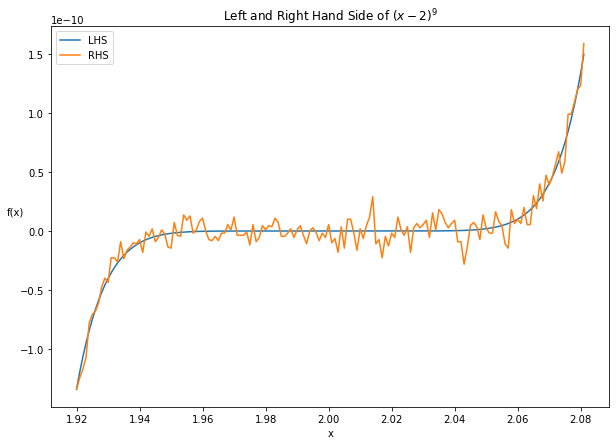

In [92]:
plt.figure(figsize=[10,7])
plt.plot(x,f(x), label='LHS')
plt.plot(x,f2(x), label='RHS')
plt.xlabel('x'); plt.ylabel('f(x)', rotation=0)
plt.title('Left and Right Hand Side of $(x-2)^9$');
plt.legend();

While the two functions are analytically equal, numerical roundoff causes errors in the evaluation of the RHS. The errors are on the order of 1E-10.

# Problem 3

## Part (a)

In [181]:
m,n=(25,20)

for m,n in [(25,20),(250,200), (500,400), (1000,800), (2000,1600)]:
    A=np.random.randn(m,n)
    print('condition number:',np.round(np.linalg.cond(A),2),' m: ',m,' n: ',n)

condition number: 14.43  m:  25  n:  20
condition number: 16.91  m:  250  n:  200
condition number: 16.59  m:  500  n:  400
condition number: 17.11  m:  1000  n:  800
condition number: 18.54  m:  2000  n:  1600


In [192]:
conds = []
n=20
for m in np.arange(n,1000,1):
    conds.append(np.round(np.linalg.cond(np.random.randn(m,n)),2))

Making a system more and more overdetermined:

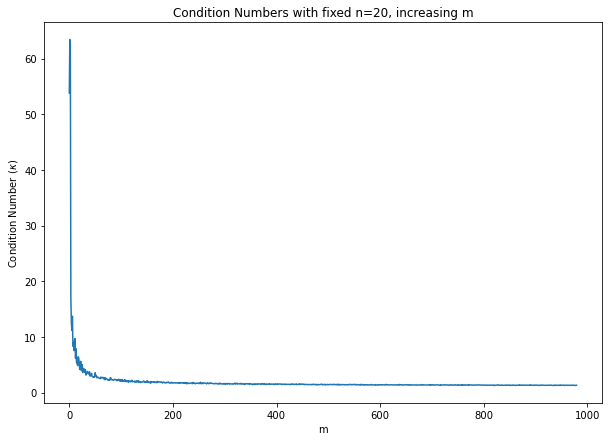

In [193]:
plt.figure(figsize=[10,7])
plt.plot(conds)
plt.title('Condition Numbers with fixed n=20, increasing m')
plt.ylabel('Condition Number ($\kappa$)'); plt.xlabel('m');

Making a system more and more underdetermined:

In [196]:
conds = []
m=20
for n in np.arange(m,1000,1):
    conds.append(np.round(np.linalg.cond(np.random.randn(m,n)),2))

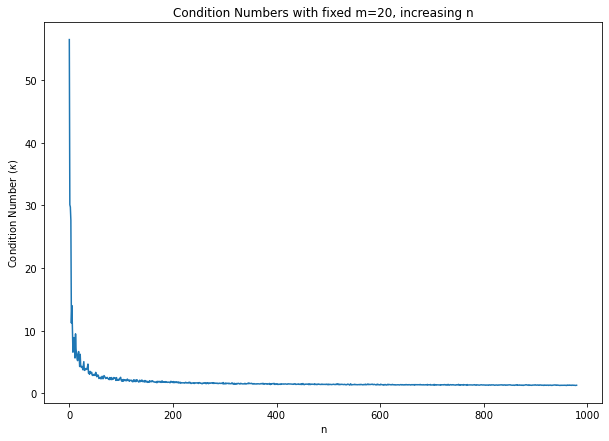

In [198]:
plt.figure(figsize=[10,7])
plt.plot(conds)
plt.title('Condition Numbers with fixed m=20, increasing n')
plt.ylabel('Condition Number ($\kappa$)'); plt.xlabel('n');

In [199]:
from mpl_toolkits import mplot3d

In [200]:
x = np.arange(1,100,1)
y = np.arange(1,100,1)
xx, yy = np.meshgrid(x, y)

@np.vectorize
def grid_cond(x,y):
    return np.linalg.cond(np.random.randn(x,y))

z = grid_cond(xx,yy)

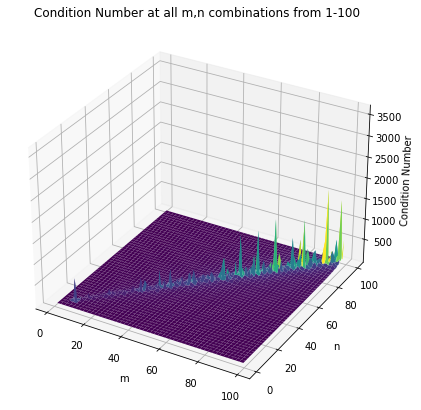

In [201]:
fig = plt.figure(figsize=[10,7])
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, z,cmap='viridis', edgecolor='none')
ax.set_title('Condition Number at all m,n combinations from 1-100');
ax.set_ylabel('n'); ax.set_xlabel('m'); ax.set_zlabel('Condition Number');
plt.show()

## Part (b)

To be able to compute the determinant, make m = n+1, so that when another column is added, the matrix becomes square.

In [202]:
m=21
n=20
A = np.random.randn(m,n)

A = np.concatenate((A,A[:,0].reshape(m,1)), axis=1)

print('condition number:',np.linalg.cond(A))

condition number: 5.4489801443632904e+16


In [203]:
print('determinant:',np.linalg.det(A))

determinant: 4.1717282205500886e-08


## Part (c)

In [204]:
eps_space=np.logspace(-16,0,1000)
cond_B=[]
B = A.copy()
B[:,n] = B[:,0]
condBaseline = np.linalg.cond(B)
for eps in eps_space:
    B = A.copy()
    B[:,n] = B[:,0] + eps*np.random.randn(m)
    cond_B.append(np.linalg.cond(B))

In [205]:
eps_df = pd.DataFrame(cond_B, index=eps_space, columns=['k'])

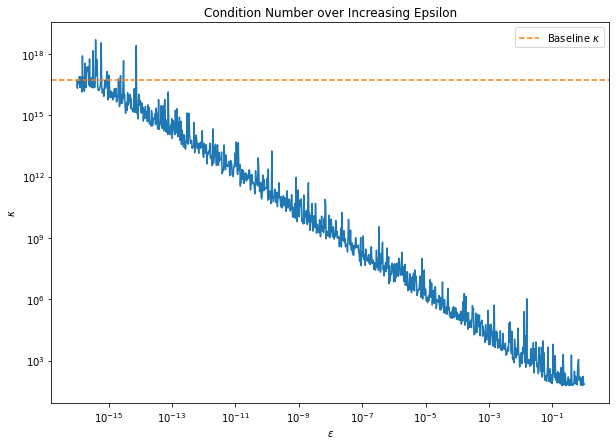

In [206]:
plt.figure(figsize=[10,7])
plt.plot(eps_df['k'])
plt.xscale('log')
plt.yscale('log')
plt.axhline(condBaseline, label='Baseline $\kappa$', c='C1', ls='--')
plt.xlabel('$\epsilon$'); plt.ylabel('$\kappa$'); plt.legend()
plt.title('Condition Number over Increasing Epsilon');

Condition number decreases very quickly then remains constantly low as larger noise is added to the (m+1)th column.  
See a non-log x axis here:

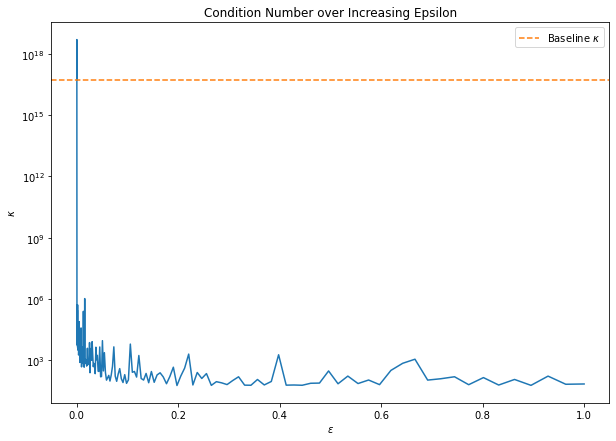

In [207]:
plt.figure(figsize=[10,7])
plt.plot(eps_df['k'])
#plt.xscale('log')
plt.yscale('log')
plt.axhline(condBaseline, label='Baseline $\kappa$', c='C1', ls='--')
plt.xlabel('$\epsilon$'); plt.ylabel('$\kappa$'); plt.legend()
plt.title('Condition Number over Increasing Epsilon');